# 朝倉書店「医学への統計学」5章 平均値に関する推測

例題をJuliaを使って解いてみる。

In [36]:
using Distributions
using HypothesisTests
using Plots

## 例題5.1

腎機能障害の患者6名の血清クレアチニン濃度（mg/dl）を測定しデータを得た。この疾患の血清クレアチニン濃度の母平均の95%信頼区間を求めよ。

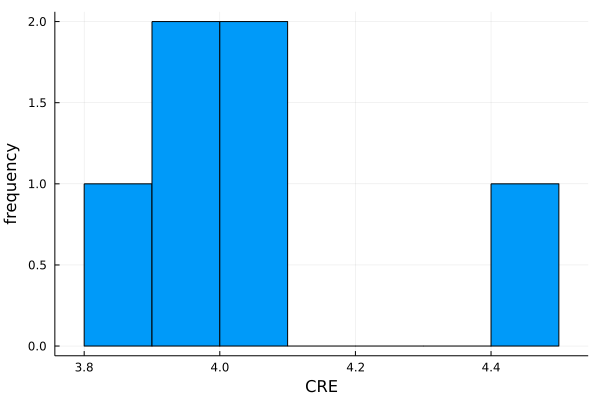

In [37]:
data = [4.0, 3.9, 3.8, 4.0, 4.4, 3.9]
histogram(data, xlabel="CRE", ylabel="frequency",　label=:none)

正規分布に従うと考え、自由度n-1のt分布より95%信頼区間を計算する。

In [38]:
xbar = mean(data)
n = length(data)
s = std(data)
α = 0.05
t = quantile(TDist(n-1), α/2)
println("Manually calculated 95% confidence intervals: ", (xbar - t * s/√n, xbar + t * s/√n))
confint(OneSampleTTest(xbar, s, n), α)

Manually calculated 95% confidence intervals: (4.220131476941603, 3.779868523058397)


(3.779868523058397, 4.220131476941603)

## 例題5.2

あるタイプの肝炎疾患11名のアルカリフォスファターゼ値（IU/l）のデータを得た。このタイプの肝疾患のALP値の母平均の95%信頼区間を求めよ。

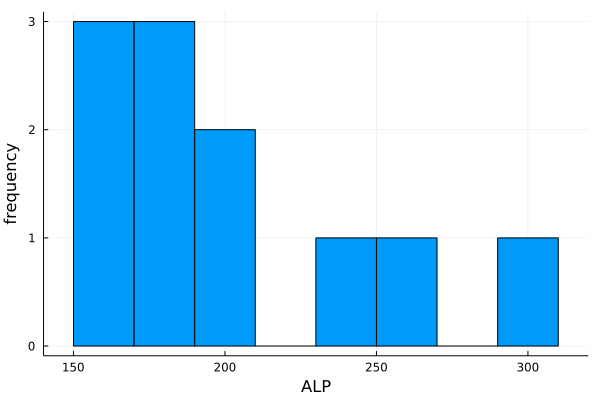

In [39]:
data = [206, 235, 155, 169, 180, 199, 151, 172, 291, 182, 260]
histogram(data, bins=150:20:310, xlabel="ALP", ylabel="frequency", label=:none)

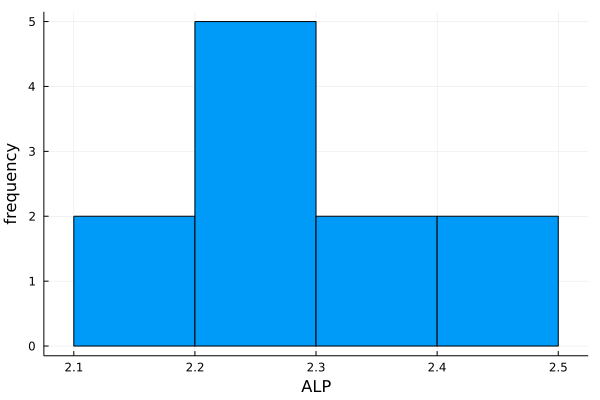

In [40]:
histogram(log10.(data), xlabel="ALP", ylabel="frequency", label=:none)

対数を取った値は正規分布を示すため、対数変換した値に対して自由度n-1のt分布より95%信頼区間を計算する。

In [41]:
log10_CI95 = confint(OneSampleTTest(log10.(data)); level=0.95, tail=:both)

(2.230229134495169, 2.3535385357012646)

$Y = log_{10}X$の逆変換、$X = 10^Y$を用いて$\mu$の95%信頼区間を計算する。

In [42]:
lower = round(10^log10_CI95[1], digits=1)
upper = round(10^log10_CI95[2], digits=1)
println("$lower ≦ μ ≦ $upper")

169.9 ≦ μ ≦ 225.7


In [43]:
# 対数変換しなかった場合
CI95 = confint(OneSampleTTest(data); level=0.95, tail=:both)
lower = round(CI95[1], digits=1)
upper = round(CI95[2], digits=1)
println("$lower ≦ μ ≦ $upper")    # 信頼区間の上限が大きくなってしまう

169.9 ≦ μ ≦ 230.1


## 例題5.3

例題5.1において、別の病院のおける、同じ腎機能障害の血清クレアチニン濃度の平均値は4.3mg/dlであった。測定法は同じとし、二つの病院を受診した患者の層に違いは認められるか求めよ。

$$
  H_0: \mu = \mu_0 \\
  H_1: \mu \ne \mu_0
$$

In [44]:
data = [4.0, 3.9, 3.8, 4.0, 4.4, 3.9]

xbar = mean(data)
n = length(data)
s = std(data)
μ0 = 4.3
t_statistic = abs((xbar - μ0) / (s/√n))  # 両側検定
p_val = 2*ccdf(TDist(n-1), abs(t_statistic))

println("Manually calculated test statistic: ", round(t_statistic, digits=3))
println("Manually calculated p-value: ", round(p_val, digits=3))
OneSampleTTest(data, μ0)

Manually calculated test statistic: 3.503
Manually calculated p-value: 0.017


One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         4.3
    point estimate:          4.0
    95% confidence interval: (3.78, 4.22)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0172

Details:
    number of observations:   6
    t-statistic:              -3.503245248726848
    degrees of freedom:       5
    empirical standard error: 0.0856348838577676


従って、有意水準5%で有意差が認められる。

## 例題5.4

例題5.2において、別のタイプの肝炎患者のALP値は過去の症例から平均値が226（IU/l）であることがわかっている。二つのタイム間に差があるといえるか求めよ。

In [45]:
data = [206, 235, 155, 169, 180, 199, 151, 172, 291, 182, 260]
μ0 = 226
OneSampleTTest(log10.(data), log10(μ0))

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         2.35411
    point estimate:          2.29188
    95% confidence interval: (2.23, 2.354)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0483

Details:
    number of observations:   11
    t-statistic:              -2.2487345891773862
    degrees of freedom:       10
    empirical standard error: 0.027670941848209202


## 例題5.5

透析患者の免疫グロブリンの一つIgG値（mg/100ml）が健常者に比べて高いかを調べるため、40歳代男性の透析患者9名、同年代の病院職員の健常者7名のIgGを測定し、データを得た。これから、透析患者のIgGの方が健常者に比べて高いと認められるか。

In [46]:
control = [1326, 1418, 1820, 1516, 1635, 1720, 1580, 1452, 1600]
treatment = [1220, 1080, 980, 1420, 1170, 1290, 1116];

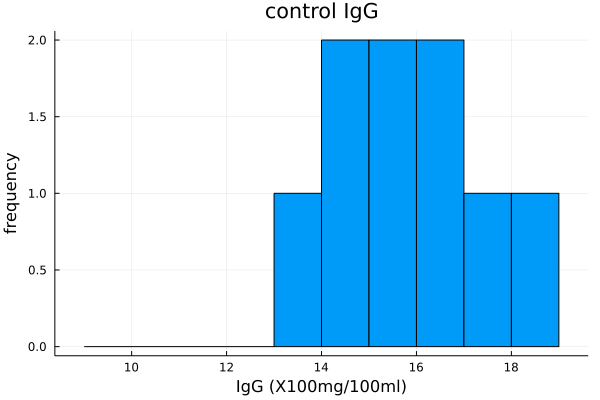

In [47]:
tmp_control = control ./ 100
histogram(tmp_control, bins=range(9, 19, step=1),
    title="control IgG", xlabel="IgG (X100mg/100ml)", ylabel="frequency",　label=:none)

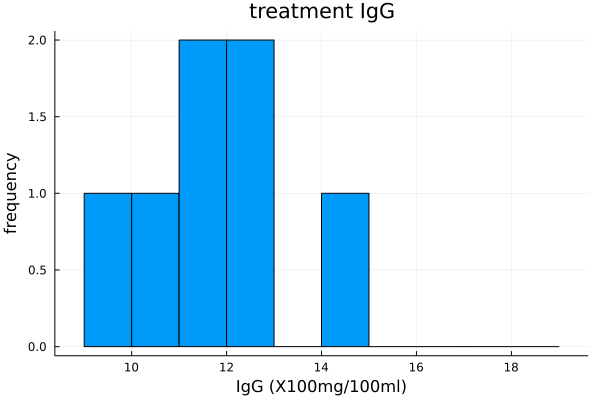

In [48]:
tmp_treatment = treatment ./ 100
histogram(tmp_treatment, bins=range(9, 19, step=1),
    title="treatment IgG", xlabel="IgG (X100mg/100ml)", ylabel="frequency",　label=:none)

対応がなく、2郡に正規分布$N(\mu_{A}, \sigma_{A}^2)$、$N(\mu_{B}, \sigma_{B}^2)$が仮定できるため、等分散のF検定を行う。

$$
  H_{0}: \sigma_{A}^2 = \sigma_{B}^2\\
  H_1: \sigma_{A}^2 \ne \sigma_{B}^2
$$

In [49]:
control_mean = mean(control)
control_var = var(control)
control_size = length(control)
treatment_mean = mean(treatment)
treatment_var = var(treatment)
treatment_size = length(treatment)
f_statistic = control_var / treatment_var
upper_percentage_point = cquantile(FDist(control_size-1, treatment_size-1), 0.10) # 有意水準20%
p_val = 2*ccdf(FDist(control_size-1, treatment_size-1), abs(f_statistic))

println("Manually calculated test statistic: ", round(f_statistic, digits=3))
println("Manually calculated upper percentage point: ", round(upper_percentage_point, digits=3))
println("Manually calculated p-value: ", round(p_val, digits=3))
VarianceFTest(control, treatment)

Manually calculated test statistic: 1.131
Manually calculated upper percentage point: 2.983
Manually calculated p-value: 0.906


Variance F-test
---------------
Population details:
    parameter of interest:   variance ratio
    value under h_0:         1.0
    point estimate:          1.13143

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9057

Details:
    number of observations: [9, 7]
    F statistic:            1.1314255262942148
    degrees of freedom:     [8, 6]


有意水準20%でも$H_{0}$は棄却されないため、通常のt検定を適用する。

In [50]:
EqualVarianceTTest(control, treatment)

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          380.714
    95% confidence interval: (218.7, 542.8)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0002

Details:
    number of observations:   [9,7]
    t-statistic:              5.038589040601389
    degrees of freedom:       14
    empirical standard error: 75.55970186225885


従って、透析患者の方が、健常者に比べて、有意水準5%でIgG値が有意に高いことが認められた。

## 例題5.6

透析患者でのIgG上昇に関して、B-cell免疫グロブリン生成（％）についても、透析患者18名、健常者9名につき測定した。差は認められるか。

In [51]:
control = [7, 8, 8, 6, 7, 11, 10, 8, 9]
treatment = [10, 13, 7, 16, 12, 12, 10, 10, 4, 17, 14, 6, 11, 12, 7, 9, 12, 9];

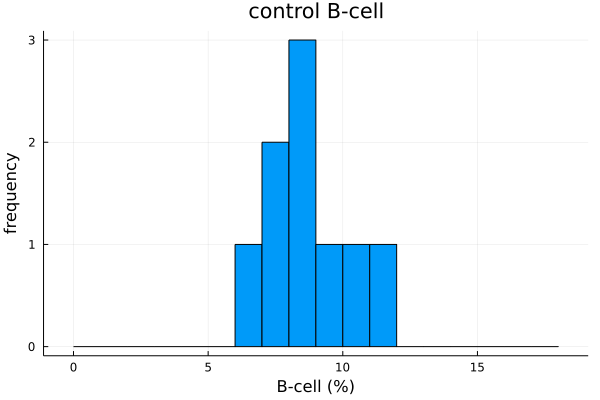

In [52]:
histogram(control, bins=range(0, 18, step=1),
    title="control B-cell", xlabel="B-cell (%)", ylabel="frequency",　label=:none)

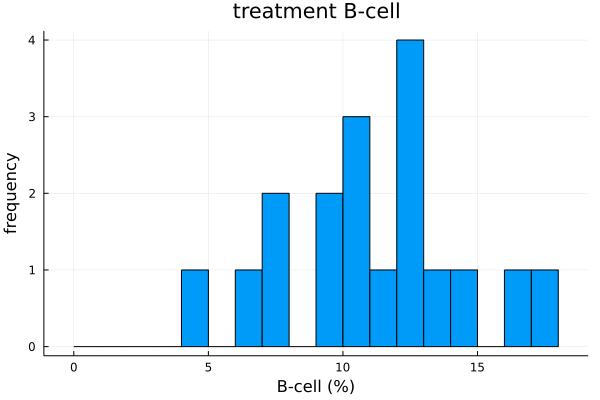

In [53]:
histogram(treatment, bins=range(0, 18, step=1),
    title="treatment B-cell", xlabel="B-cell (%)", ylabel="frequency",　label=:none)

対応がなく、正規分布に従うと仮定できるため、等分散のF検定を行う。

In [54]:
VarianceFTest(control, treatment)

Variance F-test
---------------
Population details:
    parameter of interest:   variance ratio
    value under h_0:         1.0
    point estimate:          0.216123

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0334

Details:
    number of observations: [9, 18]
    F statistic:            0.21612250794568047
    degrees of freedom:     [8, 17]


有意水準5%で、$H_{0}$は棄却されるため、Welchの検定を適用する。

In [55]:
UnequalVarianceTTest(control, treatment)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -2.38889
    95% confidence interval: (-4.343, -0.4349)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0186

Details:
    number of observations:   [9,18]
    t-statistic:              -2.518160787212002
    degrees of freedom:       24.9619827653434
    empirical standard error: 0.9486641603746688


従って、B-cell生成について、透析患者の方が、健常者に比べて、有意水準5%で有意に高いことが認められた。

### 分布の正規性が仮定できない場合

Wilcoxon順位和検定（マン・ホイットニーのU検定とも呼ばれる）を適用する。

$$
  H_{0}: \sigma_{A}^2 = \sigma_{B}^2\\
  H_1: \sigma_{A}^2 \ne \sigma_{B}^2
$$

In [56]:
MannWhitneyUTest(control, treatment)

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          -2.5

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0436

Details:
    number of observations in each group: [9, 18]
    Mann-Whitney-U statistic:             41.5
    rank sums:                            [86.5, 291.5]
    adjustment for ties:                  240.0
    normal approximation (μ, σ):          (-39.5, 19.3232)


従って、Welchの検定と同様、透析患者の方が、健常者に比べて、有意水準5%で有意に高いことが認められた。